# Packages

In [89]:
# --- Core data handling
import pandas as pd 
import numpy as np 
import datetime

# --- Visualizations
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.ticker import FuncFormatter
import seaborn as sns 

# --- Statistics and Modeling
from scipy import stats
from scipy.stats import kstest, zscore
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# Data information

In [90]:
trips_amount = pd.read_csv (r"c:\Users\juand\OneDrive\Escritorio\TripleTen\Sprint 8\Zuber-Impact-of-Weather-and-Other-External-Factors\datasets\moved_project_sql_result_01.csv")
drop_off = pd.read_csv (r"C:\Users\juand\OneDrive\Escritorio\TripleTen\Sprint 8\Zuber-Impact-of-Weather-and-Other-External-Factors\datasets\moved_project_sql_result_04.csv")
trips_air = pd.read_csv (r"C:\Users\juand\OneDrive\Escritorio\TripleTen\Sprint 8\Zuber-Impact-of-Weather-and-Other-External-Factors\datasets\moved_project_sql_result_07.csv")

In [91]:
trips_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [92]:
drop_off.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [93]:
trips_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


# Data types

In [94]:
trips_air['start_ts'] = pd.to_datetime (trips_air['start_ts'], format='%Y-%m-%d %H:%M:%S')

# EDA

In [95]:
print (drop_off.sort_values(by= 'average_trips', ascending= False).head(10))

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


In [96]:
top_trips= trips_amount.sort_values (by= 'trips_amount', ascending= False).head(10)

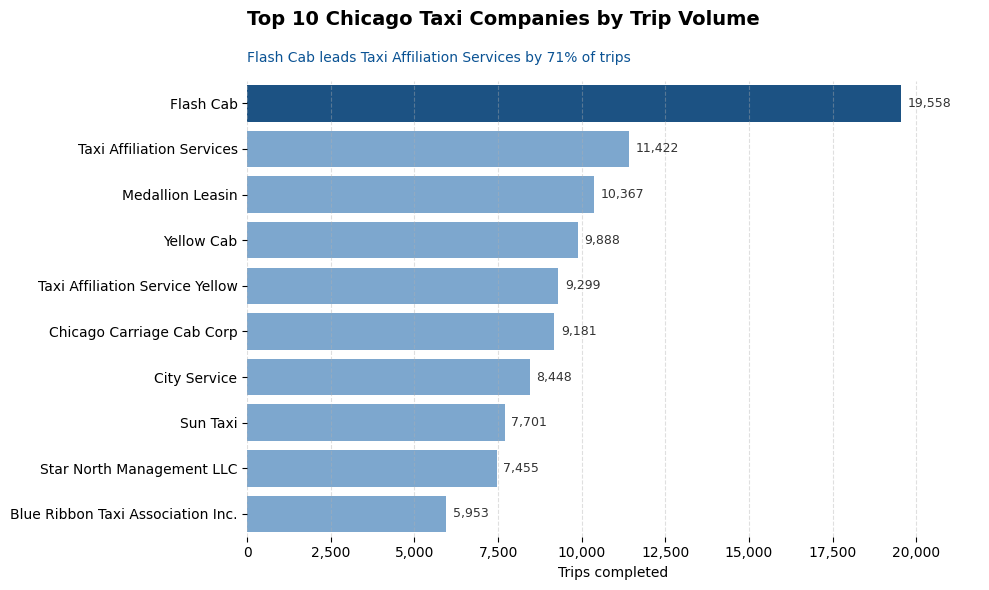

In [97]:
leader = top_trips.iloc[0]
runner_up = top_trips.iloc[1]
lift_pct = (leader['trips_amount'] / runner_up['trips_amount'] - 1) * 100

palette = [
    '#0b5394' if company == leader['company_name'] else '#6fa8dc'
    for company in top_trips['company_name']
]

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_trips,
    y='company_name',
    x='trips_amount',
    palette=palette
)

max_value = top_trips['trips_amount'].max()
label_offset = max_value * 0.01

for bar in ax.patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(width + label_offset, y, f'{width:,.0f}', va='center', fontsize=9, color='#333333')

ax.set_xlabel('Trips completed')
ax.set_ylabel('')
ax.set_xlim(0, max_value * 1.12)
ax.set_title('Top 10 Chicago Taxi Companies by Trip Volume', fontsize=14, pad=40, loc='left', weight= 'bold')
ax.text(
    0,
    1.04,
    f"{leader['company_name']} leads {runner_up['company_name']} by {lift_pct:.0f}% of trips",
    transform=ax.transAxes,
    fontsize=10,
    color='#0b5394'
)
ax.xaxis.grid(True, linestyle='--', alpha=0.4)
ax.xaxis.set_major_formatter(FuncFormatter(lambda value, _: f'{int(value):,}'))
sns.despine(left=True, bottom=True)
plt.tight_layout()


**Takeaways**
- Flash Cab completes 19,558 trips - about 71% more rides than Taxi Affiliation Services, the next largest fleet.
- The top three fleets capture 42% of rides among the top ten operators, indicating a concentrated market.
- Partnering with the top four companies would cover roughly half of observed taxi trips in the dataset.


In [98]:
top_neighborhood = drop_off.sort_values(by= 'average_trips', ascending= False).head(10)

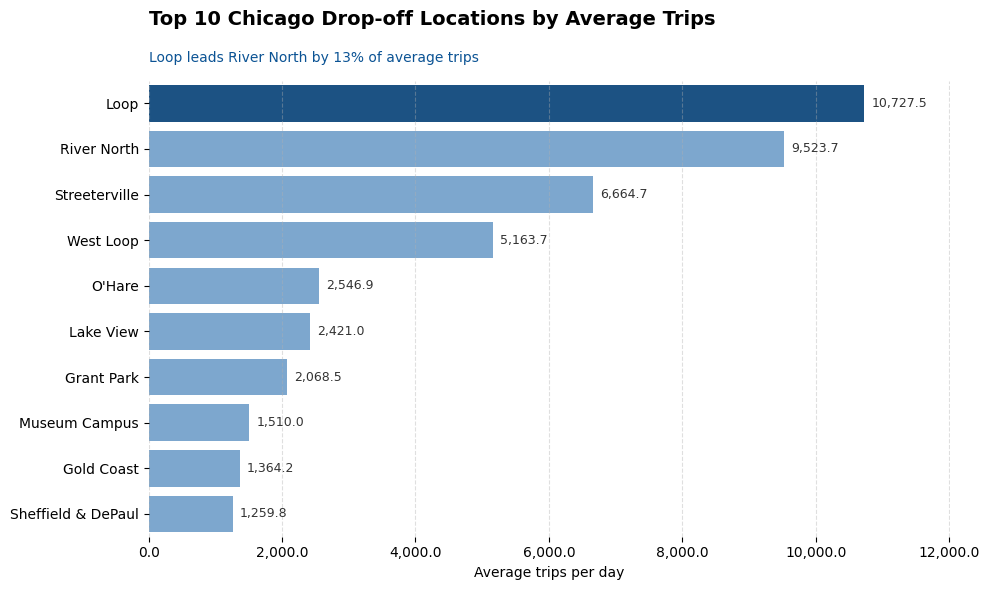

In [99]:
# Select the leading drop-off location by average trips
leader_n = top_neighborhood.iloc[0]
# Capture the second strongest drop-off location for comparison
runner_up_n = top_neighborhood.iloc[1]
# Calculate the leader's percentage lift over the runner-up
lift_pct_n = (leader_n['average_trips'] / runner_up_n['average_trips'] - 1) * 100

# Build a custom palette that highlights the top location
palette = [
    '#0b5394' if drop_location == leader_n['dropoff_location_name'] else '#6fa8dc'
    # Use a standout color for the leader and a softer tone for the rest
    for drop_location in top_neighborhood['dropoff_location_name']
    # Iterate through each drop-off location to assign a color
]

# Create the figure canvas with a presentation-friendly aspect ratio
plt.figure(figsize=(10, 6))
# Render a horizontal bar chart of average trips
ax = sns.barplot(
    # Supply the ranked neighborhood data
    data=top_neighborhood,
    # Map drop-off names to the y-axis for legible labels
    y='dropoff_location_name',
    # Map average trip counts to the x-axis to set bar lengths
    x='average_trips',
    # Apply the custom palette so the leader stands out
    palette=palette
)

# Capture the maximum average trips to guide axis scaling
max_value = top_neighborhood['average_trips'].max()
# Offset label text slightly beyond each bar for clear annotations
label_offset = max_value * 0.01

# Annotate each bar with its precise value
for bar in ax.patches:
    # Measure the bar width (average trips value)
    width = bar.get_width()
    # Find the vertical midpoint to center the text
    y = bar.get_y() + bar.get_height() / 2
    # Place a formatted label at the end of each bar
    ax.text(width + label_offset, y, f'{width:,.1f}', va='center', fontsize=9, color='#333333')

# Polish the axes and headings for a business-ready look
ax.set_xlabel('Average trips per day')
ax.set_ylabel('')
ax.set_xlim(0, max_value * 1.12)
ax.set_title('Top 10 Chicago Drop-off Locations by Average Trips', fontsize=14, pad=40, loc='left', weight='bold')
ax.text(
    # Anchor the subtitle at the top-left of the axes
    0,
    # Position just above the title
    1.04,
    # Summarize the leader advantage in percentage terms
    f"{leader_n['dropoff_location_name']} leads {runner_up_n['dropoff_location_name']} by {lift_pct_n:.0f}% of average trips",
    # Keep placement stable regardless of data scale
    transform=ax.transAxes,
    # Choose a readable subtitle size
    fontsize=10,
    # Tie the subtitle color to the highlighted bar
    color='#0b5394'
)
ax.xaxis.grid(True, linestyle='--', alpha=0.4)
ax.xaxis.set_major_formatter(FuncFormatter(lambda value, _: f'{value:,.1f}'))
sns.despine(left=True, bottom=True)
plt.tight_layout()


**Neighborhood Takeaways**
- Loop averages 10,727 daily drop-offs - about 13% more traffic than runner-up River North.
- Loop, River North, and Streeterville together account for roughly 62% of drop-offs among the top ten destinations.
- Covering the top five neighborhoods would address about 80% of the observed drop-off activity.


**Overall Conclusions**
- Flash Cab completed 19,558 trips in the period, around 71% more rides than the next largest fleet. They remain the highest-impact partner for ensuring trip coverage and reliability.
- Drop-off demand concentrates in the Loop, averaging 10,727 daily arrivals roughly 13% more than River North highlighting the central business district as the primary endpoint in the network.
- Combining these views suggests anchoring marketing, driver allocation, and rider promotions around Flash Cab coverage into the Loop to capture the densest demand pockets and secure consistent service quality.


# Normality Test

To select the statistical method to be used in comparing user scores by platform and gender, the normality of the data will be assessed using graphical analyses (histograms and Q-Q plots) and the Shapiro-Wilk test.

The Shapiro-Wilk test will compare the following hypotheses:

- H₀: The sample comes from a population with a normal distribution.

- H₁: The sample does not come from a population with a normal distribution.

The results of this analysis will determine whether parametric or non-parametric tests are used in subsequent comparisons.

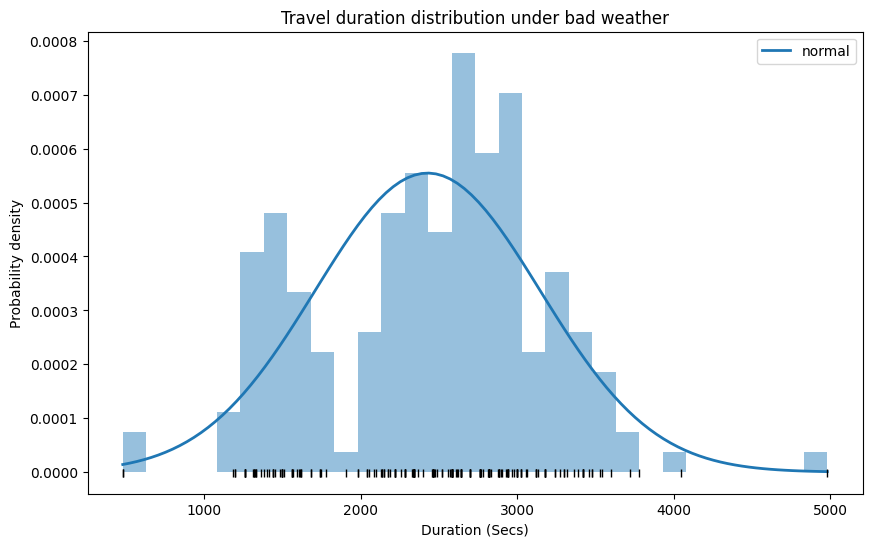

In [101]:
bad_weather = trips_air.query ('weather_conditions == "Bad"')
bad_duration = bad_weather['duration_seconds']

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit (bad_duration)

# Valores teóricos de la normal en el grupo observado 
x_hat = np.linspace(min(bad_duration), max(bad_duration), num=100)
y_hat = stats.norm.pdf (x_hat, mu, sigma)

# Gráfico 
fig, ax = plt.subplots (figsize=(10,6))
ax.plot (x_hat, y_hat, linewidth=2, label='normal')
ax.hist (x=bad_duration, density=True, bins=30, color='#3182bd', alpha=0.5)
ax.plot (bad_duration, np.full_like(bad_duration, -0.000001), '|k', markeredgewidth=1)
ax.set_title ('Travel duration distribution under bad weather')
ax.set_xlabel ('Duration (Secs)')
ax.set_ylabel ('Probability density')
ax.legend ();


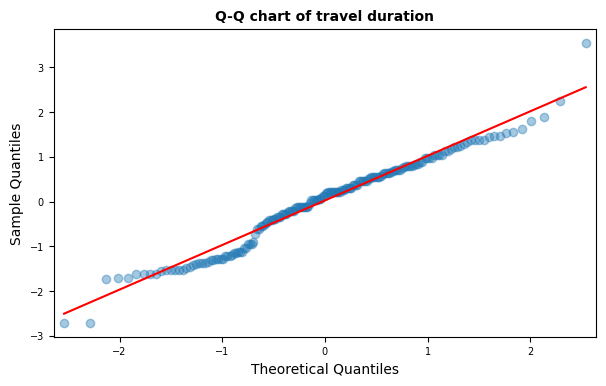

In [102]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    bad_duration, 
    fit=True, 
    line='q',
    alpha=0.4,
    lw=2,
    ax=ax
)
ax.set_title('Q-Q chart of travel duration', fontsize=10,
             fontweight='bold')
ax.tick_params(labelsize=7)

In [103]:
stat, p_value = stats.shapiro (bad_duration)
if p_value < 0.05: 
    print (f'We reject the null hypothesis that the data exhibit a normal distribution with a p value of {round(p_value, 2)}')
else:
    print (f'We accept the null hypothesis that the data exhibit a normal distribution with a p value of {round(p_value, 2)}')

We reject the null hypothesis that the data exhibit a normal distribution with a p value of 0.0


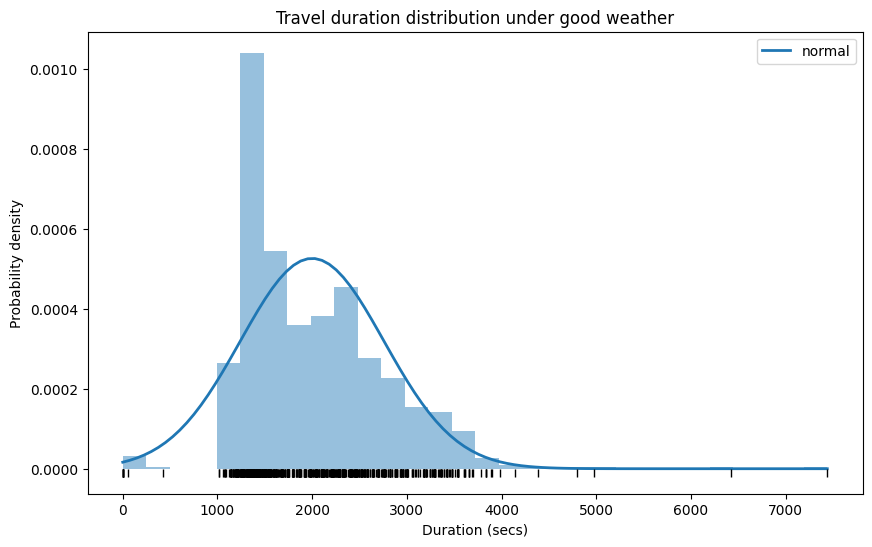

In [104]:
good_weather = trips_air.query('weather_conditions=="Good"')
good_duration = good_weather['duration_seconds']

mu, sigma = stats.norm.fit (good_duration)
x_hat = np.linspace (min(good_duration), max(good_duration), num=100)
y_hat = stats.norm.pdf (x_hat, mu, sigma)

fig, ax = plt.subplots (figsize=(10,6))
ax.plot (x_hat, y_hat, linewidth=2, label='normal')
ax.hist (good_duration, density=True, bins=30, color='#3182bd', alpha=0.5)
ax.plot (good_duration, np.full_like (good_duration, -0.00001), '|k', markeredgewidth=1)
ax.set_title ('Travel duration distribution under good weather')
ax.set_xlabel ('Duration (secs)')
ax.set_ylabel ('Probability density')
ax.legend (); 

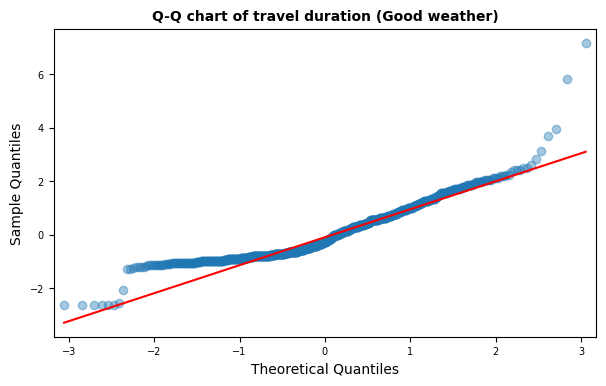

In [105]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    good_duration,
    fit=True,
    line='q',
    alpha=0.4,
    lw=2,
    ax=ax
)
ax.set_title('Q-Q chart of travel duration (Good weather)', fontsize=10,
             fontweight='bold')
ax.tick_params(labelsize=7)


In [106]:
stat, p_value = stats.shapiro (good_duration)
if p_value < 0.05: 
    print (f'We reject the null hypothesis that the data exhibit a normal distribution with a p value of {round(p_value, 2)}')
else:
    print (f'We accept the null hypothesis that the data exhibit a normal distribution with a p value of {round(p_value, 2)}')

We reject the null hypothesis that the data exhibit a normal distribution with a p value of 0.0


Based on the graphical and normality analyses performed (Shapiro-Wilk test), the null hypothesis that the duration of trips on days with bad weather and good weather comes from a normal distribution is rejected. For this reason, non-parametric statistics are used. Since two independent groups are being compared, the Mann-Whitney U test is applied, which is suitable for testing the differences in the distribution of scores between both platforms.

# Hypothesis test

Since we do not have a prior directional hypothesis about the behavior of the data, the two-tailed Mann-Whitney U test will be used. In this case, the hypotheses to be tested are:

- H₀: The distributions of trip duration are the same regardless of weather conditions.

- H₁: The distributions of trip duration are different depending on weather conditions.

In [109]:
alpha = 0.01
stat, p_value = stats.mannwhitneyu (good_duration, bad_duration)

if p_value < alpha: 
    print (f"Rechazamos la hipótesis nula con p_value = {round (p_value, 4)}")
else: 
    print (f"Aceptamos la hipótesis nula con p_value = {round (p_value, 4)}")

Rechazamos la hipótesis nula con p_value = 0.0


The two-tailed Mann-Whitney U hypothesis test indicates that the null hypothesis is rejected, as statistically significant evidence was found that the duration of trips varies according to weather conditions, suggesting that good or bad weather does have an effect on the duration of trips.

**Overall Conclusions**
- Flash Cab delivered 19,558 completed trips during the study period - roughly 71% more rides than the next largest fleet - confirming it as the key partner for dependable coverage.
- Trip demand terminates primarily in the Loop, which absorbs about 10,727 daily drop-offs (13% above River North) and concentrates top-destination volume alongside River North and Streeterville.
- The Mann-Whitney U test at alpha = 0.01 rejected the null hypothesis that trip durations are the same under good and bad weather, reinforcing that inclement weather stretches travel times and should be factored into planning.
